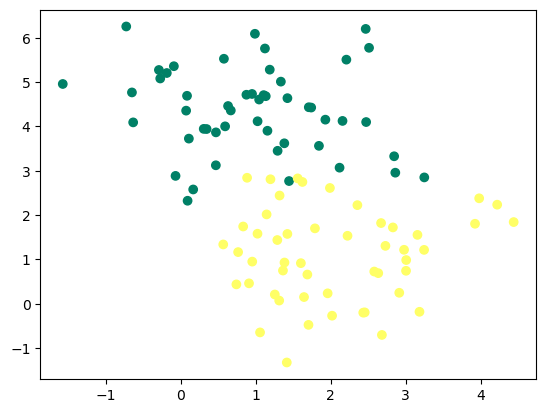

array([[ 4.21850347,  2.23419161],
       [ 0.90779887,  0.45984362],
       [-0.27652528,  5.08127768],
       [ 0.08848433,  2.32299086],
       [ 3.24329731,  1.21460627],
       [ 1.44193252,  2.76754364],
       [ 1.0220286 ,  4.11660348],
       [ 3.97820955,  2.37817845],
       [ 0.58894326,  4.00148458],
       [ 1.25185786,  0.20811388],
       [ 0.62835793,  4.4601363 ],
       [ 1.68608568,  0.65828448],
       [ 1.18454506,  5.28042636],
       [ 0.06897171,  4.35573272],
       [ 1.78726415,  1.70012006],
       [ 4.4384123 ,  1.84214315],
       [ 3.18190344, -0.18226785],
       [ 0.30380963,  3.94423417],
       [ 0.73936011,  0.43607906],
       [ 1.28535145,  1.43691285],
       [ 1.1312175 ,  4.68194985],
       [ 0.66471755,  4.35995267],
       [ 1.31570453,  2.44067826],
       [-0.18887976,  5.20461381],
       [ 2.57854418,  0.72611733],
       [ 0.87305123,  4.71438583],
       [ 1.3105127 ,  0.07122512],
       [ 0.9867701 ,  6.08965782],
       [ 1.42013331,

In [257]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

y.shape

X

In [249]:
#initialisation des parametres de notre RN
def initialisation(n0, n1,n2): 
     #paramétres premiéres couches
     W1=np.random.randn(n1,n0)
     b1=np.random.randn(n1,1)
    #paramétres de la seconde couche  
     W2=np.random.randn(n2,n1)
     b2=np.random.randn(n2,1)
     
     parametres= {
          'W1': W1,
          'W2': W2,
          'b1': b1,
          'b2': b2 
     }

     return parametres


In [250]:
def forward_propagation(X,parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']

    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1/(1-np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1/(1-np.exp(-Z2))

    activations= {
        
        'A1' : A1, #on en aura besoin pour le calcul du gradient pour le backpropagation
        'A2' : A2 
    }

    return activations

# gradient (back_propagation)


    
    # activation={'A0':X}

    # #en sachant que le nombre de parametres est le double de la taille du réseau (nombre de couches) alors on a:
    # C= len(parametres)//2 #division entiére
    # for c in range(1,C+1):

    #     Z=parametres['W'+str(c)].dot(activation['A'+str(c-1)])+parametres['b'+str(c)] 

    #     activation['A'+str(c)]=1/(1+np.exp(-Z))
        
    # return activation

In [251]:
def back_propagation(X, y, activations,parametres):

    A1=activations['A1']
    A2=activations['A2']

    W1=parametres['W1']
    W2=parametres['W2']

    m=y.shape[0]
    dZ2 = A2 - y
   
    dW2 = 1 / m *dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2)*A1*(1-A1)
    dW1 = 1 / m *dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2    }
    

    return gradients

In [252]:
#La mise à jour des paramétres

def update(gradiants, parametres, learning_rate):

    W1=parametres['W1']
    b1=parametres['b1']
    W2=parametres['W2']
    b2=parametres['b2']

    dW1=gradiants['dW1']
    dW2=gradiants['dW2']
    db1=gradiants['db1']
    db2=gradiants['db2']

    ##=Mis à jour

    W2 -= learning_rate*dW2
    b1 -= learning_rate*db1
    W1 -= learning_rate*dW1
    b2 -= learning_rate*db2
    

    parametres= {
          'W1': W1,
          'W2': W2,
          'b1': b1,
          'b2':b2 
     }
    
    
    return parametres





In [253]:
def model(X, parametres):
    activations=forward_propagation(X,parametres)

    A2= activations['A2']

    return A2 >=0.5

In [254]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
def neural_network(X_train, y_train,n1, learning_rate=0.1, n_iter=150):
        #initialisatioN, W et b
        n0=X_train.shape[0]
        n2=y_train.shape[0]
        #n1 à choisir (le nombred eneurones qu'on désir avoir dans notre premiére couche)
        parametres=initialisation(n0,n1,n2)

        #pour visualiser l'évolution de la fonction coût
        train_loss=[]
        train_acc=[]
        for i in range(n_iter):

                activations = forward_propagation(X_train, parametres)
                gradiants = back_propagation(X_train, y_train, activations,parametres)
                parametres=update(gradiants,parametres,learning_rate)
                
                if i%10==0:

                        train_loss.append(log_loss(y_train,activations['A2']))
                        y_pred = model(X_train,parametres)
                       # current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
                       # train_acc.append(current_accuracy)


        

        

        
        
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(train_loss, label='train loss')

        #plt.subplot(1,2,2)
       # plt.plot(train_acc, label='train accuracy')

        plt.legend()
        plt.show()
        return parametres


                

(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)

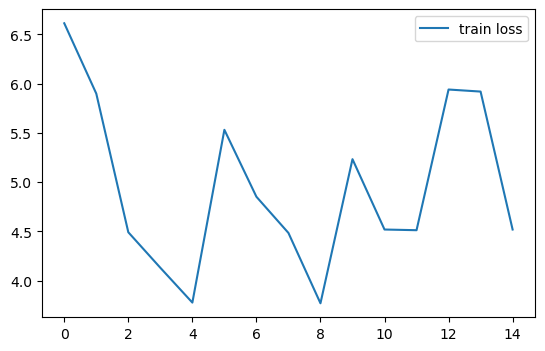

In [255]:
parametres=neural_network(X,y,2)
